ФИО:

In [ ]:
print('Зорин Михаил Алексеевич')

Зорин Михаил Алексеевич


## Задание 1. HTTP-запросы, ответы и погода

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API. Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime

def get_weather(latitude, longitude):
  api_url = "https://api.open-meteo.com/v1/forecast"
  params = {
      "latitude": latitude,
      "longitude": longitude,
      "hourly": "precipitation",
      "timezone": "Europe/Moscow",
      "daily": "weathercode",
      "current_weather": "true"
  }

  response = requests.get(api_url, params=params)

  if response.status_code == 200:
    data = response.json()
    temperature = data['current_weather']['temperature']
    precipitation = sum(data['hourly']['precipitation'])/len(data['hourly']['precipitation'])
    weathercode = data['current_weather']['weathercode']

    description = get_weather_description(weathercode)

    today = datetime.today().strftime("%d.%m")

    return f"Сегодня ({today}) температура воздуха {temperature} ◦С, {precipitation} мм осадков, {description}"
  else:
    return f"Ошибка при получении данных о погоде: {response.status_code}"

def get_weather_description(weathercode):
  """
  Возвращает текстовое описание погоды по коду.
  """
  descriptions = {
      0: "Ясно",
      1: "Малооблачно",
      2: "Облачно",
      3: "Пасмурно",
      45: "Туман",
      51: "Легкий дождь",
      53: "Дождь",
      55: "Сильный дождь",
      56: "Морось",
      61: "Легкий снег",
      63: "Снег",
      65: "Сильный снег",
      66: "Снежная крупа",
      71: "Легкий град",
      73: "Град",
      80: "Легкий ливень",
      81: "Ливень",
      82: "Сильный ливень",
      85: "Дождь с грозой",
      95: "Гроза"
  }
  return descriptions.get(weathercode, "Неизвестная погода")

latitude, longitude = map(float, input("Введите широту и долготу через запятую: ").split(','))
weather_info = get_weather(latitude, longitude)
print(weather_info)

Введите широту и долготу через запятую: 50,60
{'latitude': 50.0, 'longitude': 60.0, 'generationtime_ms': 0.10800361633300781, 'utc_offset_seconds': 10800, 'timezone': 'Europe/Moscow', 'timezone_abbreviation': 'MSK', 'elevation': 274.0, 'current_weather_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature': '°C', 'windspeed': 'km/h', 'winddirection': '°', 'is_day': '', 'weathercode': 'wmo code'}, 'current_weather': {'time': '2024-10-29T15:00', 'interval': 900, 'temperature': 3.4, 'windspeed': 6.6, 'winddirection': 193, 'is_day': 1, 'weathercode': 80}, 'hourly_units': {'time': 'iso8601', 'precipitation': 'mm'}, 'hourly': {'time': ['2024-10-29T00:00', '2024-10-29T01:00', '2024-10-29T02:00', '2024-10-29T03:00', '2024-10-29T04:00', '2024-10-29T05:00', '2024-10-29T06:00', '2024-10-29T07:00', '2024-10-29T08:00', '2024-10-29T09:00', '2024-10-29T10:00', '2024-10-29T11:00', '2024-10-29T12:00', '2024-10-29T13:00', '2024-10-29T14:00', '2024-10-29T15:00', '2024-10-29T16:00', '2024-10-29T

## Задание 2. HTTP-запросы, ответы и покемоны


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


url = 'https://pokeapi.co/api/v2/pokemon/?offset=0&limit=20'

response =  requests.get(url)
data=response.json()

if response.status_code == 200:
  pokemon_names = [pokemon['name'] for pokemon in data['results']]
  print(pokemon_names)

  pokemon_name = input('Введите имя покемона: ')

  pokemon_response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon_name}')

  if pokemon_response.status_code == 200:
    pokemon_data = pokemon_response.json()
    print(f'Информация о покемоне {pokemon_name}:')
    print(f'Имя: {pokemon_data['name']}')
    print(f'Тип: {', '.join([type['type']['name'] for type in pokemon_data['types']])}')
    print(f'Вес: {pokemon_data['weight']} кг')
    print(f'Рост: {pokemon_data['height']} м')
    print(f'Способности: {', '.join([ability['ability']['name'] for ability in pokemon_data['abilities']])}')
  else:
    print(f'Ошибка: Не удалось получить информацию о покемоне {pokemon_name}')
else:
  print('Ошибка: Не удалось получить список покемонов.')

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']
Введите имя покемона: ivysaur
Информация о покемоне ivysaur:
Имя: ivysaur
Тип: grass, poison
Вес: 130 кг
Рост: 10 м
Способности: overgrow, chlorophyll


## Задание 3. HTTP-запросы, ответы и посты

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


def get_all_posts():
  response = requests.get('https://jsonplaceholder.typicode.com/posts')

  if response.status_code == 200:
    for i in response.json():
      print_post_info(i)
    return
  else:
    print('Ошибка при получении списка постов.')
    return

def get_post_by_id(post_id):
  response = requests.get(f'https://jsonplaceholder.typicode.com/posts/{post_id}')

  if response.status_code == 200:
    print_post_info(response.json())
    return
  else:
    print(f'Ошибка при получении поста с ID {post_id}.')
    return

def print_post_info(post_data):
  if post_data:
    print(f'ID: {post_data['id']}')
    print(f'Заголовок: {post_data['title']}')
    print(f'Текст: {post_data['body']}')
    print(f'Пользователь ID: {post_data['userId']}')
    print('-' * 20)
  else:
    print('Данные о посте отсутствуют.')

while True:
  print(''' Что вы хотите сделать!
  1) Вывести все посты!
  2) Вывести определеный пост по ID
  3) Стоп
  Выберите дейтвие! ''')
  action=input('')
  if action=='1':
    print('Список всех постов:')
    get_all_posts()
  elif action=='2':
    post_id = input('Введите ID поста: ')
    post_data = get_post_by_id(post_id)
    get_post_by_id(post_data)
  elif action=='3':
    break

 Что вы хотите сделать!
  1) Вывести все посты!
  2) Вывести определеный пост по ID
  3) Стоп
  Выберите дейтвие! 
2
Введите ID поста: 2
ID: 2
Заголовок: qui est esse
Текст: est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae ea dolores neque
fugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis
qui aperiam non debitis possimus qui neque nisi nulla
Пользователь ID: 1
--------------------
Ошибка при получении поста с ID None.
 Что вы хотите сделать!
  1) Вывести все посты!
  2) Вывести определеный пост по ID
  3) Стоп
  Выберите дейтвие! 
1
Список всех постов:
ID: 1
Заголовок: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
Текст: quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
Пользователь ID: 1
--------------------
ID: 2
Заголовок: qui est esse
Текст: est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae e

## Задание 4. HTTP-запросы, ответы и работа с постами

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


def print_post_info(post_data):
  if post_data:
    print(f'ID: {post_data["id"]}')
    print(f'Заголовок: {post_data["title"]}')
    print(f'Текст: {post_data["body"]}')
    print(f'Пользователь ID: {post_data["userId"]}')
    print('-' * 20)
  else:
    print('Данные о посте отсутствуют.')

def create_post(title, body, userId):
  url = 'https://jsonplaceholder.typicode.com/posts'
  data = {'title': title, 'body': body, 'userId': userId}
  response = requests.post(url, json=data)

  if response.status_code == 201:
      return response.json()
  else:
      print(f'Ошибка при создании поста: {response.status_code}')
      return

def update_post(postId, title, body):
  url = f'https://jsonplaceholder.typicode.com/posts/{postId}'
  data = {'title': title, 'body': body}
  response = requests.put(url, json=data)

  if response.status_code == 200:
    return response.json()
  else:
    print(f'Ошибка при обновлении поста: {response.status_code}')
    return

def delete_post(postId):
  url = f'https://jsonplaceholder.typicode.com/posts/{postId}'
  response = requests.delete(url)
  return response.status_code

while True:
  print(''' Что вы хотите сделать!
  1) Создать новый пост
  2) Изменить старый пост
  3) Удалить пост
  4) Стоп
  Выберите дейтвие! ''')
  action=input('')

  if action=='1':
    title = input('Заголовок: ')
    body = input('Содержимое поста: ')
    userId = int(input('ID пользователя: '))
    new_post = create_post(title, body, userId)
    print('Созданный пост:')
    print_post_info(new_post)

  elif action=='2':
    postId = int(input('Введите ID поста для обновления: '))
    new_title = input('Новый заголовок: ')
    new_body = input('Новое содержимое: ')
    updated_post = update_post(postId, new_title, new_body)
    print('Обновленный пост:')
    print_post_info(requests.get(f'https://jsonplaceholder.typicode.com/posts/{postId}').json()) # я хз он говорит что удалил и изменил но ничего не меняеться

  elif action=='3':
    postId = int(input('Введите ID поста для удаления: '))
    status_code = delete_post(postId)
    print(f'Статус-код ответа: {status_code}')

  elif action=='4'
    break

 Что вы хотите сделать!
  1) Создать новый пост 
  2) Изменить старый пост
  3) Удалить пост
  4) Стоп
  Выберите дейтвие! 
1
Заголовок: протокол HTTP
Содержимое поста: TOP
ID пользователя: 2
Созданный пост:
ID: 101
Заголовок: протокол HTTP
Текст: TOP
Пользователь ID: 2
--------------------
 Что вы хотите сделать!
  1) Создать новый пост 
  2) Изменить старый пост
  3) Удалить пост
  4) Стоп
  Выберите дейтвие! 
2
Введите ID поста для обновления: 3
Новый заголовок: 123
Новое содержимое: 123
Обновленный пост:
ID: 3
Заголовок: ea molestias quasi exercitationem repellat qui ipsa sit aut
Текст: et iusto sed quo iure
voluptatem occaecati omnis eligendi aut ad
voluptatem doloribus vel accusantium quis pariatur
molestiae porro eius odio et labore et velit aut
Пользователь ID: 1
--------------------
 Что вы хотите сделать!
  1) Создать новый пост 
  2) Изменить старый пост
  3) Удалить пост
  4) Стоп
  Выберите дейтвие! 
3
Введите ID поста для удаления: 3
Статус-код ответа: 200
 Что вы хотите 

## Задание 5. HTTP-запросы, ответы и пёсики

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


 Выберите дейтвие:
  1) Вывести список всех пород собак!
  2) Вывести изображени собак!
  3) Стоп
  
Выберите дейтиве: 1
Список всех пород собак:
['affenpinscher', 'african', 'airedale', 'akita', 'appenzeller', 'australian', 'bakharwal', 'basenji', 'beagle', 'bluetick', 'borzoi', 'bouvier', 'boxer', 'brabancon', 'briard', 'buhund', 'bulldog', 'bullterrier', 'cattledog', 'cavapoo', 'chihuahua', 'chippiparai', 'chow', 'clumber', 'cockapoo', 'collie', 'coonhound', 'corgi', 'cotondetulear', 'dachshund', 'dalmatian', 'dane', 'danish', 'deerhound', 'dhole', 'dingo', 'doberman', 'elkhound', 'entlebucher', 'eskimo', 'finnish', 'frise', 'gaddi', 'germanshepherd', 'greyhound', 'groenendael', 'havanese', 'hound', 'husky', 'keeshond', 'kelpie', 'kombai', 'komondor', 'kuvasz', 'labradoodle', 'labrador', 'leonberg', 'lhasa', 'malamute', 'malinois', 'maltese', 'mastiff', 'mexicanhairless', 'mix', 'mountain', 'mudhol', 'newfoundland', 'otterhound', 'ovcharka', 'papillon', 'pariah', 'pekinese', 'pembro

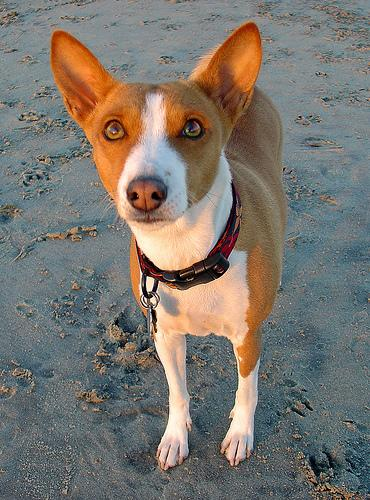

Изображение породы bakharwal:


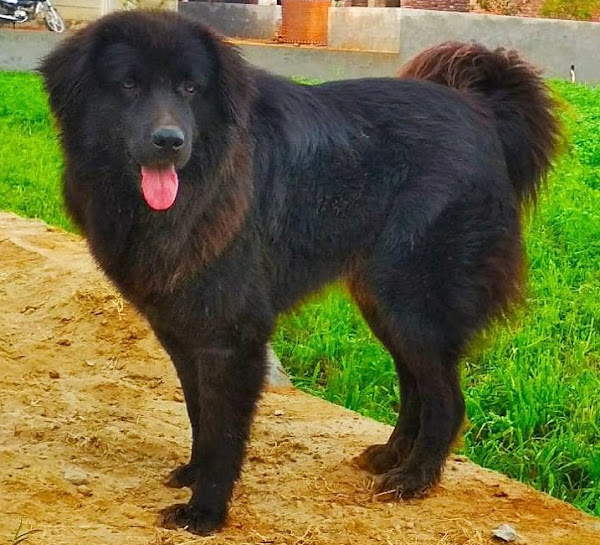

 Выберите дейтвие:
  1) Вывести список всех пород собак!
  2) Вывести изображени собак!
  3) Стоп
  
Выберите дейтиве: 3


In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io

def get_all_breeds():
  response = requests.get("https://dog.ceo/api/breeds/list/all")

  if response.status_code == 200:
    breeds =  list(response.json()["message"].keys())
    return breeds
  else:
    return "Ошибка при получении списка пород."


def get_breed_images(breeds):
  breeds = breeds.split(',')
  for breed in breeds:
    breed = breed.strip()
    response_img = requests.get(f"https://dog.ceo/api/breed/{breed}/images/random")
    if response.status_code == 200:
      image_url = response_img.json()["message"]
      print(f"Изображение породы {breed}:")
      res = requests.get(image_url)
      img = Image.open(io.BytesIO(res.content))
      display(img)
    else:
      print(f"Ошибка при получении изображения для породы {breed}.")

while True:
  print(''' Выберите дейтвие:
  1) Вывести список всех пород собак!
  2) Вывести изображени собак!
  3) Стоп
  ''')
  action=input('Выберите дейтиве: ')

  if action=='1':
    print("Список всех пород собак:")
    print(get_all_breeds())
  elif action=='2':
    breeds = input("Введите породы собак через запятую: ")
    get_breed_images(breeds)
  elif action=='3':
    break